<a href="https://colab.research.google.com/github/AdriNarendra/Heroku_tutorial3/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [ ]:
path = "https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv"

In [ ]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )
loan_data.shape

(491, 14)

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')
test_data.shape

(123, 12)

In [ ]:
loan_data.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,245.000000,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,141.883755,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,122.500000,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,245.000000,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,367.500000,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,490.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [ ]:
test = {'ApplicantIncome' : 123124, 'CoapplicantIncome' : 4213, 'Gender' : 'M' , 'Married' : 'Yes'}

In [ ]:
catvar = ['ApplicantIncome', 'CoapplicantIncome']

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            123 non-null    object 
 1   Gender             120 non-null    object 
 2   Married            121 non-null    object 
 3   Dependents         117 non-null    object 
 4   Education          123 non-null    object 
 5   Self_Employed      120 non-null    object 
 6   ApplicantIncome    123 non-null    int64  
 7   CoapplicantIncome  123 non-null    float64
 8   LoanAmount         117 non-null    float64
 9   Loan_Amount_Term   122 non-null    float64
 10  Credit_History     116 non-null    float64
 11  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 11.7+ KB


In [ ]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    404
180.0     35
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
36.0       2
60.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

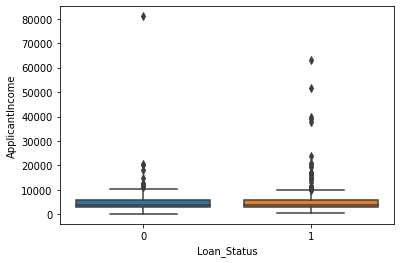

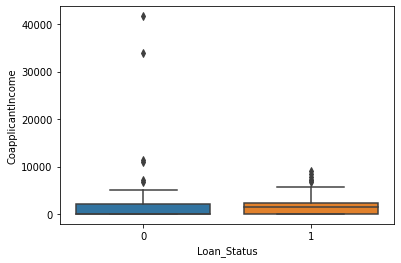

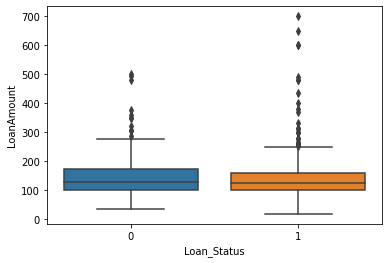

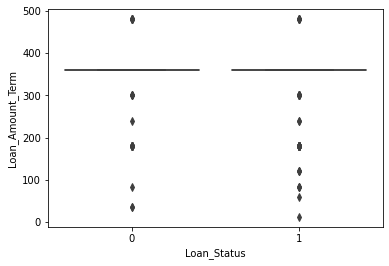

In [ ]:
numeric_data=loan_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
#for feature in numeric_data.columns:
  #sbs.boxplot(x=loan_data[Loan_Statusnumeric_data=heart_data[['age', 'trestbps', 'chol', 'thalach','oldpeak']]
for feature in numeric_data.columns:
  sbs.boxplot(x=loan_data['Loan_Status'], y=feature, data=numeric_data)
  #plt.show()', y=feature, data=numeric_data)
  plt.show()

In [ ]:
df = loan_data.drop(['Unnamed: 0','Loan_ID'],axis=1)

In [ ]:
test_data = test_data.drop('Loan_ID',axis=1)

In [ ]:
X = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

In [ ]:
X_test.isnull().sum()

Gender                2
Married               1
Dependents            4
Education             0
Self_Employed        10
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            6
Loan_Amount_Term      1
Credit_History        4
Property_Area         0
dtype: int64

In [ ]:
test_data.isnull().sum()

Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

In [ ]:
categorical_data = X_train.drop(numeric_data.columns, axis=1)    # dropping the numerical columns from the dataframe 'data'
categorical_data.nunique()   # nunique() return you the number of unique values in each column/feature

Gender            2
Married           2
Dependents        4
Education         2
Self_Employed     2
Credit_History    2
Property_Area     3
dtype: int64

In [ ]:
categorical_data = X_test.drop(numeric_data.columns, axis=1)    # dropping the numerical columns from the dataframe 'data'
categorical_data.nunique()   # nunique() return you the number of unique values in each column/feature

Gender            2
Married           2
Dependents        4
Education         2
Self_Employed     2
Credit_History    2
Property_Area     3
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

In [ ]:
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0])], 
                                      remainder='passthrough')

Filling NA

In [ ]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
imp_mean.fit(X_train[numeric_data.columns])
imp_median.fit(X_train[numeric_data.columns])
imp_mode.fit(X_train[categorical_data.columns])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [ ]:
X_train[numeric_data.columns] = imp_median.transform(X_train[numeric_data.columns]) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
X_train[categorical_data.columns] = imp_mode.transform(X_train[categorical_data.columns]) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
X_test[numeric_data.columns] = imp_median.transform(X_test[numeric_data.columns]) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
X_test[categorical_data.columns] = imp_mode.transform(X_test[categorical_data.columns]) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
test_data[numeric_data.columns] = imp_median.transform(test_data[numeric_data.columns]) 

In [ ]:
test_data[categorical_data.columns] = imp_mode.transform(test_data[categorical_data.columns]) 

In [ ]:
X_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
X_train.Property_Area.unique()

array(['Rural', 'Semiurban', 'Urban'], dtype=object)

One Hot Encoding

In [ ]:
Xtrain_ohe = X_train.copy()
Xtest_ohe = X_test.copy()

In [ ]:
Xtrain_ohe

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
53,Male,Yes,0,Graduate,No,3707.0,3166.0,182.0,360.0,1.0,Rural
163,Male,Yes,3+,Graduate,No,3167.0,4000.0,180.0,300.0,0.0,Semiurban
325,Male,Yes,1,Graduate,No,2787.0,1917.0,146.0,360.0,0.0,Rural
147,Male,Yes,2,Graduate,No,5391.0,0.0,130.0,360.0,1.0,Urban
304,Female,No,0,Graduate,Yes,2600.0,1717.0,99.0,300.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
333,Male,Yes,2,Graduate,No,3276.0,484.0,135.0,360.0,1.0,Semiurban
24,Male,Yes,0,Graduate,No,4600.0,0.0,73.0,180.0,1.0,Semiurban
153,Female,No,0,Not Graduate,No,2165.0,0.0,70.0,360.0,1.0,Semiurban
464,Female,Yes,0,Not Graduate,No,2149.0,3237.0,178.0,360.0,0.0,Semiurban


In [ ]:
#le = LabelEncoder() 
  
#Xtrain_ohe['Gender']= le.fit_transform(Xtrain_ohe['Gender']) 
#Xtrain_ohe['Married']= le.fit_transform(Xtrain_ohe['Married'])
#Xtrain_ohe['Dependents']= le.fit_transform(Xtrain_ohe['Dependents'])
#Xtrain_ohe['Education']= le.fit_transform(Xtrain_ohe['Education'])
#Xtrain_ohe['Self_Employed']= le.fit_transform(Xtrain_ohe['Self_Employed'])
#Xtrain_ohe['Credit_History']= le.fit_transform(Xtrain_ohe['Credit_History'])


In [ ]:
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out
    def transform(self, X, **kwargs):
      sparse_matrix = super(OneHotEncoder, self).transform(X)
      new_columns = self.get_new_columns(X=X)
      d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
      return d_out
    def get_new_columns(self, X):
      new_columns = []
      for i, column in enumerate(X.columns):
          j = 0
          while j < len(self.categories_[i]):
            new_columns.append(f'{column}_<{self.categories_[i][j]}>')
            j += 1
      return new_columns
    def fit_transform(self, X, **kwargs):
      self.fit(X)
      return self.transform(X)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

In [ ]:
# print(skl.__version__)

NameError: ignored

In [ ]:
Xtrain_ohe['Credit_History']=Xtrain_ohe['Credit_History'].astype(str)

In [ ]:
Xtest_ohe['Credit_History']=Xtest_ohe['Credit_History'].astype(str)

In [ ]:
test_data['Credit_History']=test_data['Credit_History'].astype(str)

In [ ]:
Xtrain_ohe.Credit_History.values

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(Xtrain_ohe[categorical_data.columns])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [ ]:
import pickle

In [ ]:
pkl_filename = "one_hot_encoder.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(encoder, file)

In [ ]:
Xtrain_ohe[categorical_data.columns]

In [ ]:
encoder.transform(np.array(pd.DataFrame(categorical_data.iloc[0:1,])))

ValueError: ignored

In [ ]:
pd.DataFrame(categorical_data.iloc[0:1,]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 32 to 32
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1 non-null      object 
 1   Married         1 non-null      object 
 2   Dependents      1 non-null      object 
 3   Education       1 non-null      object 
 4   Self_Employed   1 non-null      object 
 5   Credit_History  1 non-null      float64
 6   Property_Area   1 non-null      object 
dtypes: float64(1), object(6)
memory usage: 64.0+ bytes


In [ ]:
test = pd.DataFrame(columns=list(categorical_data.columns))
test.loc[0] = ['Male','Yes','1','Graduate','No','0.0','Semiurban']

In [ ]:
encoder.transform(test)

,Gender_<Female>,Gender_<Male>,Married_<No>,Married_<Yes>,Dependents_<0>,Dependents_<1>,Dependents_<2>,Dependents_<3+>,Education_<Graduate>,Education_<Not Graduate>,Self_Employed_<No>,Self_Employed_<Yes>,Credit_History_<0.0>,Credit_History_<1.0>,Property_Area_<Rural>,Property_Area_<Semiurban>,Property_Area_<Urban>
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
print(pd.__version__)

In [ ]:
#encoder = OneHotEncoder()
ohe_train = encoder.transform(Xtrain_ohe[categorical_data.columns])
ohe_train.shape

(392, 17)

In [ ]:
list(ohe_train.columns)

['Gender_<Female>',
 'Gender_<Male>',
 'Married_<No>',
 'Married_<Yes>',
 'Dependents_<0>',
 'Dependents_<1>',
 'Dependents_<2>',
 'Dependents_<3+>',
 'Education_<Graduate>',
 'Education_<Not Graduate>',
 'Self_Employed_<No>',
 'Self_Employed_<Yes>',
 'Credit_History_<0.0>',
 'Credit_History_<1.0>',
 'Property_Area_<Rural>',
 'Property_Area_<Semiurban>',
 'Property_Area_<Urban>']

In [ ]:
ohe_test = encoder.transform(Xtest_ohe[categorical_data.columns])
ohe_test.shape

(99, 17)

In [ ]:
testdata_ohe = encoder.transform(test_data[categorical_data.columns])

In [ ]:
testdata_ohe = pd.DataFrame(testdata_ohe)

In [ ]:
frame_train = [Xtrain_ohe[numeric_data.columns],ohe_train]
frame_test = [Xtest_ohe[numeric_data.columns],ohe_test]
frame_td = [test_data[numeric_data.columns],testdata_ohe]

In [ ]:
Xtrain_ohe

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
53,Male,Yes,0,Graduate,No,3707.0,3166.0,182.0,360.0,1.0,Rural
163,Male,Yes,3+,Graduate,No,3167.0,4000.0,180.0,300.0,0.0,Semiurban
325,Male,Yes,1,Graduate,No,2787.0,1917.0,146.0,360.0,0.0,Rural
147,Male,Yes,2,Graduate,No,5391.0,0.0,130.0,360.0,1.0,Urban
304,Female,No,0,Graduate,Yes,2600.0,1717.0,99.0,300.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
333,Male,Yes,2,Graduate,No,3276.0,484.0,135.0,360.0,1.0,Semiurban
24,Male,Yes,0,Graduate,No,4600.0,0.0,73.0,180.0,1.0,Semiurban
153,Female,No,0,Not Graduate,No,2165.0,0.0,70.0,360.0,1.0,Semiurban
464,Female,Yes,0,Not Graduate,No,2149.0,3237.0,178.0,360.0,0.0,Semiurban


In [ ]:
Xtrain_ohedf = pd.concat(frame_train,axis=1,ignore_index=True)
Xtrain_ohedf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,53,3707.0,3166.0,182.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,163,3167.0,4000.0,180.0,300.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,325,2787.0,1917.0,146.0,360.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,147,5391.0,0.0,130.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,304,2600.0,1717.0,99.0,300.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,333,3276.0,484.0,135.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
388,24,4600.0,0.0,73.0,180.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
389,153,2165.0,0.0,70.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
390,464,2149.0,3237.0,178.0,360.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
Xtest_ohedf = pd.concat(frame_test,axis=1)
Xtest_ohedf

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_<Female>,Gender_<Male>,Married_<No>,Married_<Yes>,Dependents_<0>,Dependents_<1>,Dependents_<2>,Dependents_<3+>,Education_<Graduate>,Education_<Not Graduate>,Self_Employed_<No>,Self_Employed_<Yes>,Credit_History_<0.0>,Credit_History_<1.0>,Property_Area_<Rural>,Property_Area_<Semiurban>,Property_Area_<Urban>
32,2882.0,1843.0,123.0,480.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
42,4124.0,0.0,115.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
423,3750.0,2083.0,120.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
108,4095.0,3447.0,151.0,360.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
315,4281.0,0.0,100.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,8333.0,3167.0,165.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
143,3166.0,2064.0,104.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
366,2483.0,2466.0,90.0,180.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
94,6000.0,0.0,205.0,240.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
test_data = pd.concat(frame_td,axis=1)

In [ ]:
Xtrain_ohedf.columns == Xtest_ohedf.columns

NameError: ignored

Data Scaling

In [ ]:
scaler = preprocessing.RobustScaler().fit(Xtrain_ohedf[numeric_data.columns])
Xtrain_ohedf[numeric_data.columns] = scaler.transform(Xtrain_ohedf[numeric_data.columns])
Xtest_ohedf[numeric_data.columns] = scaler.transform(Xtest_ohedf[numeric_data.columns])

In [ ]:
Xtest_ohedf[numeric_data.columns].describe()

In [ ]:
test_data[numeric_data.columns] = scaler.transform(test_data[numeric_data.columns])

In [ ]:
print(Xtrain_ohedf.shape)
print(Xtest_ohedf.shape)

In [ ]:
print(test_data.shape)

In [ ]:
Xtrain_final = Xtrain_ohedf.copy()
Xtest_final = Xtest_ohedf.copy()

In [ ]:
Xtrain_final

In [ ]:
test = scaler.transform(np.array([123214,3214,3214,3213]).reshape(1,-1))

In [ ]:
num_data = pd.DataFrame(test)
# num_data.loc[0] = test
num_data

,0,1,2,3
0,43.068844,0.877504,49.814516,2853.0


Class Balance

In [ ]:
y_train.value_counts()

In [ ]:
labels = ['0','1']
classes = pd.value_counts(y_train)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
print(Xtrain_final.shape)
print(y_train.shape)

In [ ]:
over = SMOTE(sampling_strategy=1.0,random_state=0)
steps = [('o',over)]
pipeline = Pipeline(steps=steps)
X_res, y_res = pipeline.fit_resample(Xtrain_final,y_train)

In [ ]:
labels = ['0','1']
classes = pd.value_counts(y_res)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
print(X_res.shape)
print(y_res.shape)

Model Building

In [ ]:
lg_model = LogisticRegression(random_state=0)

In [ ]:
grid_parlg = {'penalty': ['l2','elasticnet','none'],
'dual': [True, False],
'C' : [0.25,0.5,0.75,1],
'class_weight' : ['balanced',None],
'fit_intercept': [True, False],
'solver': ['liblinear', 'saga'],
'max_iter' : [100,200],
'warm_start' : [True,False]
}

In [ ]:
X_resdf = pd.DataFrame(X_res,columns=Xtrain_final.columns)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search_lg = GridSearchCV(lg_model,grid_parlg,cv=3,n_jobs=-1,verbose=2)
grid_search_lg.fit(X_resdf,y_res)

In [ ]:
Xsimple_res = X_resdf[numeric_data.columns]
Xsimple_res

In [ ]:
#lg_model = grid_search_lg.best_estimator_.fit(X_res,y_res)

In [ ]:
simple_lg = grid_search_lg.best_estimator_.fit(Xsimple_res,y_res)

In [ ]:
grid_parxgb = {'nthread':[-1], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic',],
              'learning_rate': [0.05, 0.5, 1], #so called `eta` value
              'max_depth': [4,6,10],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5,10,1000], #number of trees, change it to 1000 for better results
              'missing':[np.nan, 100],
              'seed': [1]}

In [ ]:
from sklearn.model_selection import GridSearchCV
init_xgbmodel = xgb.XGBClassifier()
grid_search_xgb = GridSearchCV(init_xgbmodel,grid_parxgb,n_jobs=5,  
                   scoring='roc_auc',
                   verbose=2, refit=True)
grid_search_xgb.fit(X_res,y_res)

In [ ]:
grid_search_xgb.best_params_

In [ ]:
xgb_model = grid_search_xgb.best_estimator_.fit(X_res,y_res)

In [ ]:
X_complete = X

In [ ]:
xgb_model3 = grid_search_xgb.best_estimator_.fit(np.array(Xtrain_final),(y_train))

In [ ]:
xgb_model2 = xgb.XGBClassifier(colsample_bytree = 0.7,
 learning_rate = 0.05,
 max_depth= 4,
 min_child_weight = 11,
 missing = np.nan,
 n_estimators = 1000,
 nthread = -1,
 objective = 'binary:logistic',
 seed = 1,
 silent = 1,
 subsample = 0.8,random_state=0)

In [ ]:
xgb_model2.fit(X_res,y_res)

F1_Score Evaluation

In [ ]:
Xtest_final

In [ ]:
simple_lg.predict(np.array(Xtest_final[numeric_data.columns]))

In [ ]:
f1_score(y_test, simple_lg.predict(Xtest_final[numeric_data.columns]))

In [ ]:
xgb_pred = xgb_model.predict(np.array(Xtest_final))
xgb_pred

In [ ]:
xgb_pred2 = xgb_model2.predict(np.array(Xtest_final))

In [ ]:
xgb_pred3 = xgb_model3.predict(np.array(Xtest_final.iloc[0:1,]))
xgb_pred3

In [ ]:
Xtest_final.iloc[0:2,]

In [ ]:
f1_score(y_test, xgb_pred3)

In [ ]:
pred = xgb_model3.predict(np.array(test_data))

In [ ]:
submission = pd.DataFrame({'prediction':pred.astype(int)})
submission

In [ ]:
submission.to_csv('datathon3_xgb.csv',header=True, index=False)

In [ ]:
lg_model

In [ ]:
import pickle
pkl_filename = "simple_lg.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(simple_lg, file)

In [ ]:
pkl_filename = "scaler.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
model = pickle.load(open('pickle_model.pkl','rb'))

In [ ]:
pkl_filename = "xgb_model3.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(xgb_model3, file)

In [ ]:
pkl_filename = "one_hot_encoder.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(encoder, file)

In [ ]:
pkl_filename = "imp_mode.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(imp_median, file)

In [ ]:
encoder = OneHotEncoder()
encoder.fit(Xtrain_ohe[categorical_data.columns])

In [ ]:
xgb_model.save_model('xgb_model.pkl')

In [ ]:
sample = np.array([1234,5123,512,512]).reshape(1,-1)

In [ ]:
scaler.transform(sample)